In [1]:
# ==========================================
# 🏁 1. Импорт библиотек и загрузка данных
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки отображения
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Загрузка данных
df = pd.read_csv('BMW sales data (2010-2024) .csv')

# Общая информация
print("Размер датасета:", df.shape)
df.head()


Размер датасета: (50000, 11)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [2]:
# ==========================================
# 🔍 2. Первичный анализ и очистка
# ==========================================

# Проверим типы данных и пропуски
df.info()
print("\nКоличество пропусков по колонкам:")
print(df.isnull().sum())

# Проверим дубликаты
print("\nДубликатов строк:", df.duplicated().sum())

# Проверим уникальные значения в категориальных признаках
for col in ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']:
    print(f"\n{col}: {df[col].nunique()} уникальных значений")
    print(df[col].value_counts().head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB

Количество пропусков по колонкам:
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
T

C:\Users\Sergei\AppData\Local\Temp\ipykernel_12508\4251217839.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='Blues')
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


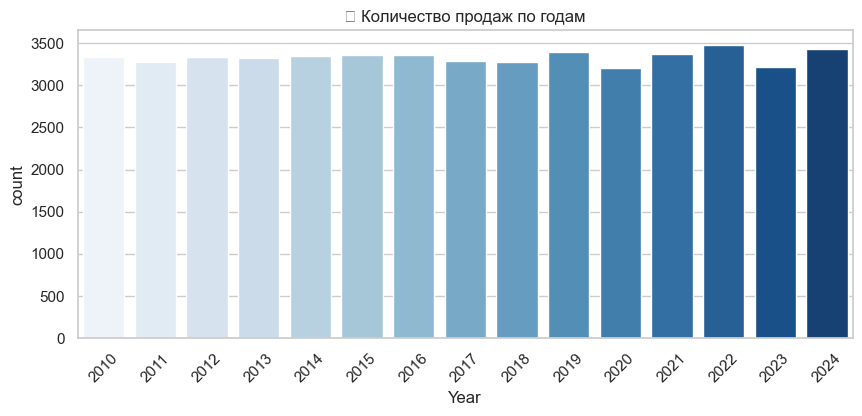

In [3]:
# ==========================================
# 📊 3. Описательная статистика
# ==========================================
df.describe().T

# Проверим разброс по годам
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Year', palette='Blues')
plt.title('📅 Количество продаж по годам')
plt.xticks(rotation=45)
plt.show()


C:\Users\Sergei\AppData\Local\Temp\ipykernel_12508\682801326.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette='viridis')
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


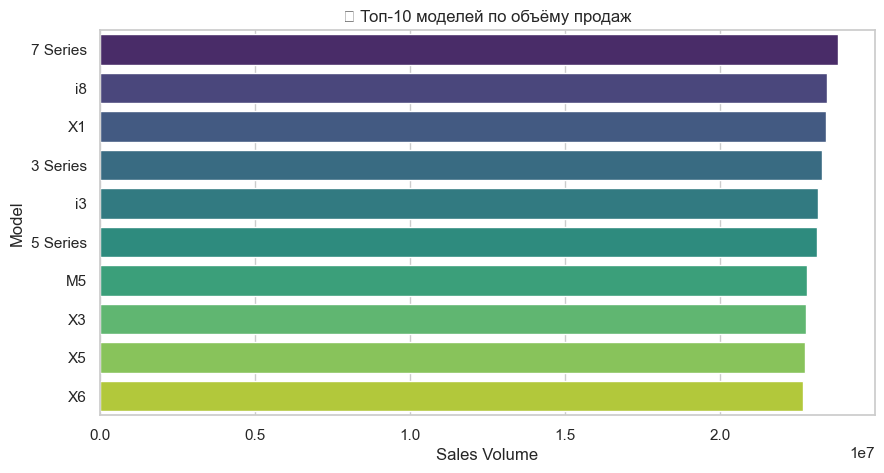

C:\Users\Sergei\AppData\Local\Temp\ipykernel_12508\682801326.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Sales_Volume', estimator=sum, ci=None, palette='coolwarm')
C:\Users\Sergei\AppData\Local\Temp\ipykernel_12508\682801326.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Sales_Volume', estimator=sum, ci=None, palette='coolwarm')
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


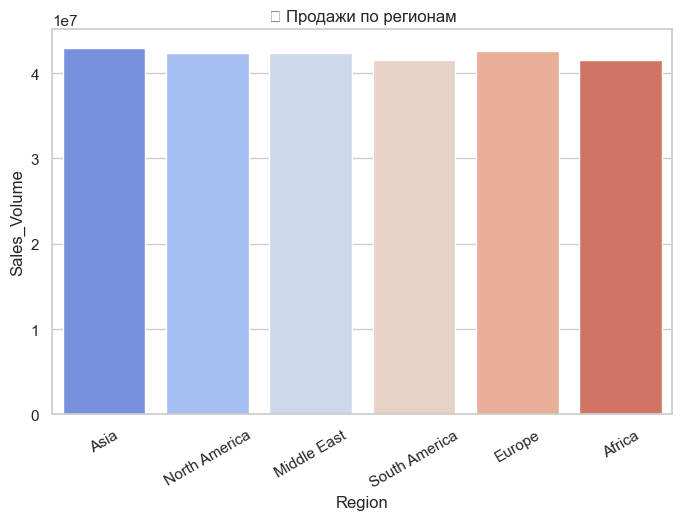

In [4]:
# ==========================================
# 🚗 4. Анализ по моделям и регионам
# ==========================================

# Топ-10 моделей по объёму продаж
top_models = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_models.values, y=top_models.index, palette='viridis')
plt.title('🔥 Топ-10 моделей по объёму продаж')
plt.xlabel('Sales Volume')
plt.show()

# Продажи по регионам
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Sales_Volume', estimator=sum, ci=None, palette='coolwarm')
plt.title('🌍 Продажи по регионам')
plt.xticks(rotation=30)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


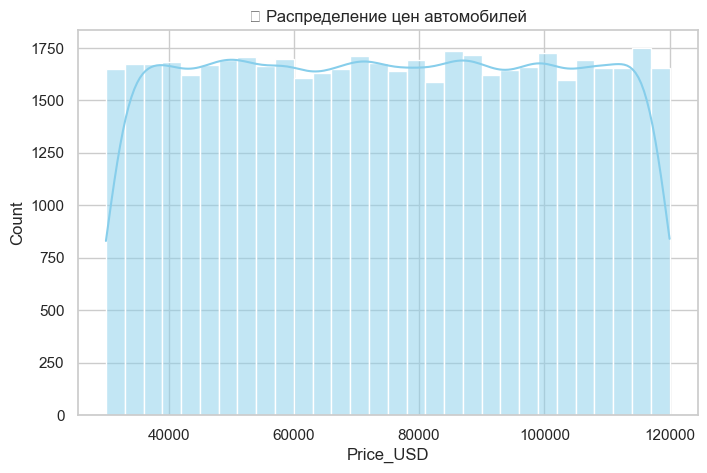

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9881 (\N{GEAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


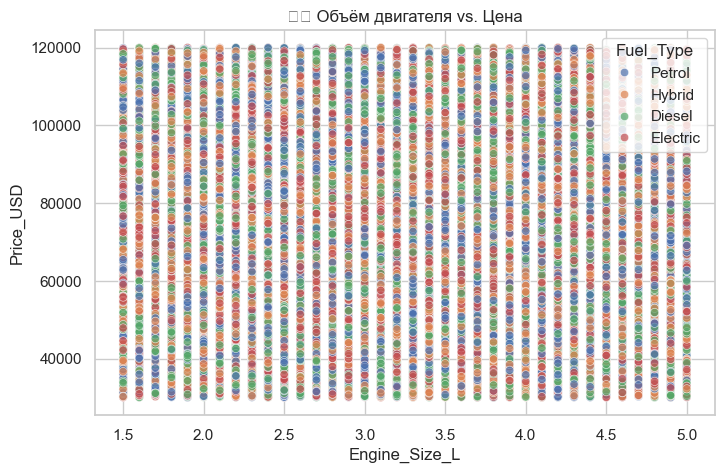

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


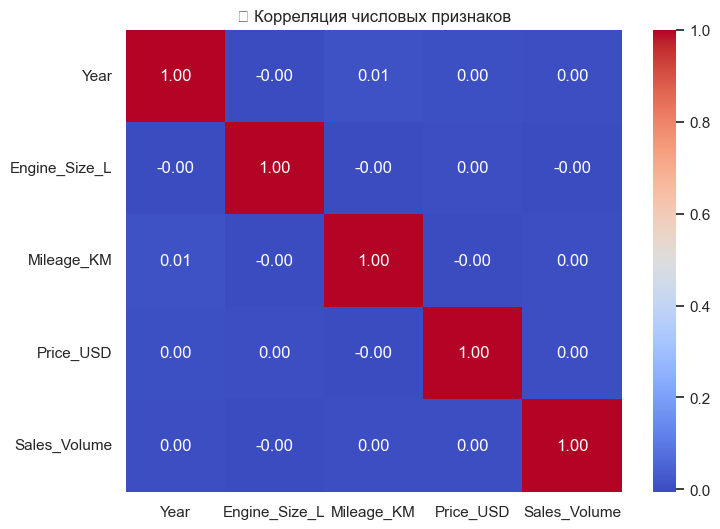

In [5]:
# ==========================================
# 💰 5. Анализ цен и характеристик
# ==========================================

# Распределение цен
plt.figure(figsize=(8,5))
sns.histplot(df['Price_USD'], bins=30, kde=True, color='skyblue')
plt.title('💵 Распределение цен автомобилей')
plt.show()

# Связь между ценой и объёмом двигателя
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Engine_Size_L', y='Price_USD', hue='Fuel_Type', alpha=0.7)
plt.title('⚙️ Объём двигателя vs. Цена')
plt.show()

# Корреляционная матрица
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('📈 Корреляция числовых признаков')
plt.show()
